In [10]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [12]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
# The citipy module finds the nearest city to the latitude and longitude pair with a population of 500 or more.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

599

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ayr
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | kirakira
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | pangai
Processing Record 7 of Set 1 | caluquembe
Processing Record 8 of Set 1 | oktyabrskoye
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | karaton
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | new norfolk
Processing Record 13 of Set 1 | tuatapere
Processing Record 14 of Set 1 | barrow
Processing Record 15 of Set 1 | tahta
Processing Record 16 of Set 1 | bairiki
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | kavaratti
Processing Record 19 of Set 1 | suntar
Processing Record 20 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | s

City not found. Skipping...
Processing Record 40 of Set 4 | rundu
Processing Record 41 of Set 4 | bay city
Processing Record 42 of Set 4 | verkhoyansk
Processing Record 43 of Set 4 | shimoda
Processing Record 44 of Set 4 | espumoso
Processing Record 45 of Set 4 | tuktoyaktuk
Processing Record 46 of Set 4 | qiongshan
Processing Record 47 of Set 4 | sandwick
Processing Record 48 of Set 4 | upata
Processing Record 49 of Set 4 | fairbanks
Processing Record 50 of Set 4 | port elizabeth
Processing Record 1 of Set 5 | bull savanna
Processing Record 2 of Set 5 | plettenberg bay
Processing Record 3 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 4 of Set 5 | cherskiy
Processing Record 5 of Set 5 | chuy
Processing Record 6 of Set 5 | kamenka
Processing Record 7 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 8 of Set 5 | morgan hill
Processing Record 9 of Set 5 | cayenne
Processing Record 10 of Set 5 | ilhabela
Processing Record 11 of Set 5 | kruis

Processing Record 29 of Set 8 | resplendor
Processing Record 30 of Set 8 | bandarbeyla
Processing Record 31 of Set 8 | wuwei
Processing Record 32 of Set 8 | griffith
Processing Record 33 of Set 8 | gainesville
Processing Record 34 of Set 8 | meulaboh
Processing Record 35 of Set 8 | ziarat
Processing Record 36 of Set 8 | kenora
Processing Record 37 of Set 8 | te anau
Processing Record 38 of Set 8 | general pico
Processing Record 39 of Set 8 | alanya
Processing Record 40 of Set 8 | haines junction
Processing Record 41 of Set 8 | eldorado
Processing Record 42 of Set 8 | hosdurga
Processing Record 43 of Set 8 | dodge city
Processing Record 44 of Set 8 | atar
Processing Record 45 of Set 8 | carauari
Processing Record 46 of Set 8 | gizo
Processing Record 47 of Set 8 | manacapuru
Processing Record 48 of Set 8 | alta floresta
Processing Record 49 of Set 8 | deputatskiy
Processing Record 50 of Set 8 | stekolnyy
City not found. Skipping...
Processing Record 1 of Set 9 | san patricio
Processing R

Processing Record 16 of Set 12 | malko tarnovo
Processing Record 17 of Set 12 | kamaishi
Processing Record 18 of Set 12 | lakes entrance
Processing Record 19 of Set 12 | longyearbyen
Processing Record 20 of Set 12 | bengkulu
Processing Record 21 of Set 12 | ambanja
Processing Record 22 of Set 12 | obigarm
Processing Record 23 of Set 12 | namibe
Processing Record 24 of Set 12 | navalmoral de la mata
Processing Record 25 of Set 12 | odweyne
Processing Record 26 of Set 12 | christchurch
Processing Record 27 of Set 12 | sinop
Processing Record 28 of Set 12 | kamskiye polyany
Processing Record 29 of Set 12 | gat
Processing Record 30 of Set 12 | barlad
Processing Record 31 of Set 12 | laguna
Processing Record 32 of Set 12 | bentiu
Processing Record 33 of Set 12 | pedernales
Processing Record 34 of Set 12 | ayutla
Processing Record 35 of Set 12 | eureka
Processing Record 36 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 37 of Set 12 | rockhampton
Processing Record 38 of

In [15]:
# Do we have at least 500 cities?

len(city_data)

548

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ayr,55.4627,-4.6339,60.31,77,100,17.27,GB,2022-08-07 02:50:52
1,Ushuaia,-54.8000,-68.3000,33.46,80,0,1.14,AR,2022-08-07 02:48:54
2,Kirakira,-10.4544,161.9205,84.96,71,56,10.63,SB,2022-08-07 02:50:52
3,Punta Arenas,-53.1500,-70.9167,35.71,93,100,5.75,CL,2022-08-07 02:50:53
4,Pangai,-19.8000,-174.3500,77.09,84,7,19.08,TO,2022-08-07 02:50:53
5,Caluquembe,-13.7833,14.6833,55.62,38,0,3.51,AO,2022-08-07 02:50:53
6,Oktyabrskoye,43.0645,44.7417,64.54,93,83,2.24,RU,2022-08-07 02:50:54
7,Puerto Ayora,-0.7393,-90.3518,67.55,98,84,5.01,EC,2022-08-07 02:50:54
8,Karaton,-6.3424,106.1045,84.69,61,2,1.48,ID,2022-08-07 02:50:54
9,Jamestown,42.0970,-79.2353,73.18,55,3,4.38,US,2022-08-07 02:47:24


In [18]:
# assign a new column order that makes more sense

new_column_order = ["City","Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ayr,GB,2022-08-07 02:50:52,55.4627,-4.6339,60.31,77,100,17.27
1,Ushuaia,AR,2022-08-07 02:48:54,-54.8000,-68.3000,33.46,80,0,1.14
2,Kirakira,SB,2022-08-07 02:50:52,-10.4544,161.9205,84.96,71,56,10.63
3,Punta Arenas,CL,2022-08-07 02:50:53,-53.1500,-70.9167,35.71,93,100,5.75
4,Pangai,TO,2022-08-07 02:50:53,-19.8000,-174.3500,77.09,84,7,19.08


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

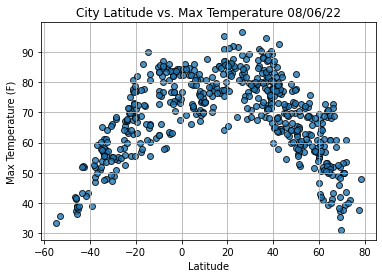

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

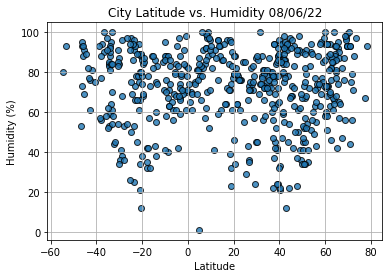

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

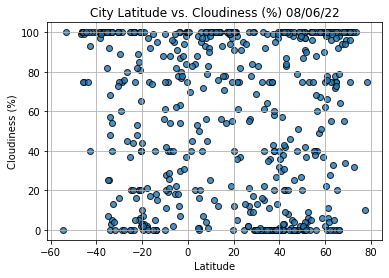

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

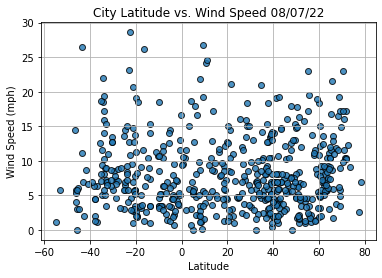

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [35]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [27]:
index13 = city_data_df.loc[13]
index13

City                        Tahta
Country                        EG
Date          2022-08-07 02:50:56
Lat                       26.7693
Lng                       31.5021
Max Temp                    81.54
Humidity                       36
Cloudiness                     21
Wind Speed                   9.57
Name: 13, dtype: object

In [36]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

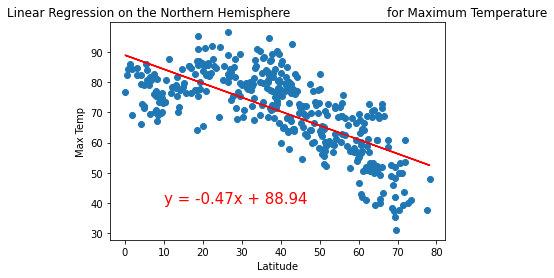

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

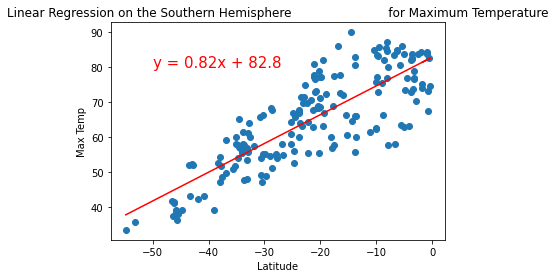

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,80))

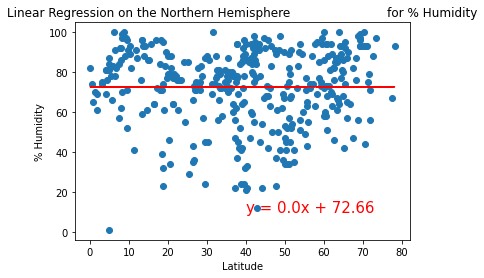

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

y = 0.02x + 7.25
The r-value is: -0.096


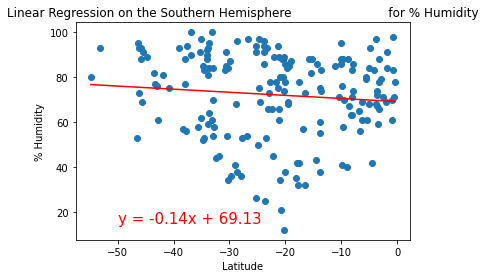

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

#get some stats printed
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
print(line_eq)
print(f"The r-value is: {r_value:.3f}")


# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

y = 0.05x + 52.72
The r-value is: 0.023


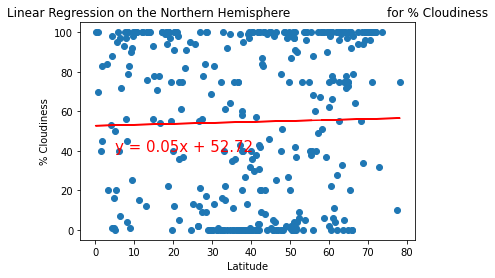

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

#get some stats printed
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
print(line_eq)
print(f"The r-value is: {r_value:.3f}")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(5,40))

y = 0.05x + 52.72
The r-value is: -0.213


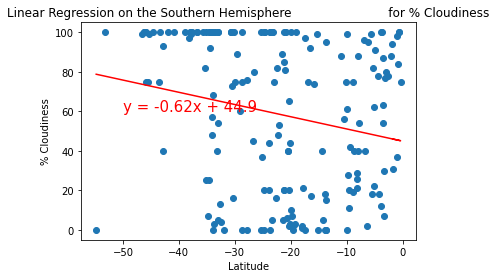

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

#get some stats printed
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
print(line_eq)
print(f"The r-value is: {r_value:.3f}")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

y = 0.05x + 52.72
The r-value is: 0.072


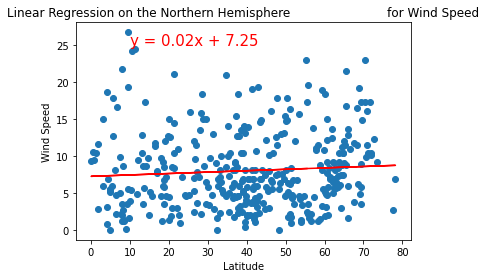

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

#get some stats printed
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
(slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
print(line_eq)
print(f"The r-value is: {r_value:.3f}")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(10,25))